In [1]:
### New File

In [2]:
import sqlite3, pandas

In [3]:
db = sqlite3.connect("citi.db")

In [4]:
def Q(sql):
    res = pandas.read_sql_query(sql,db, chunksize = 100_000)
    return next(res)

In [5]:
res = Q("SELECT COUNT(*) from CitiBikes")
res

,COUNT(*)
0,1155406


In [6]:
db.execute("""
CREATE TABLE
    Citi_Bike_Clean AS
SELECT
    (2018 - Birthyear) AS age,
    CASE WHEN gender = 0 THEN "X"
         WHEN gender = 1 THEN "M"
         WHEN gender = 2 THEN "F" END as sex,

*
FROM CitiBikes
WHERE age > 0
  AND age <80
  AND Trip_Duration < 6000
  
    
""")

In [7]:
Q("SELECT COUNT(*) from Citi_Bike_Clean")

,COUNT(*)
0,669100


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import seaborn

In [10]:
res = Q("""
SELECT age, COUNT(*) as c from Citi_Bike_Clean GROUP BY age
""")

(array([  396.,   534.,   832.,   632.,  1498.,  2390.,  4108.,  9850.,
        12720., 16808., 21022., 25952., 29970., 26944., 32342., 28674.,
        29624., 27480., 24766., 24552., 21788., 22092., 19578., 19386.,
        16460., 17484., 15482., 19556., 17902., 14372., 13122., 13440.,
        12732., 12284., 11602., 11328., 10116., 10036.,  7998.,  8560.,
         7668.,  7106.,  5756.,  5112.,  4952.,  3444.,  3318.,  3578.,
         2200.,  2510.,  1444.,  1398.,   912.,   962.,   452.,  1028.,
          358.,   270.,   220.]),
 array([21.        , 21.98305085, 22.96610169, 23.94915254, 24.93220339,
        25.91525424, 26.89830508, 27.88135593, 28.86440678, 29.84745763,
        30.83050847, 31.81355932, 32.79661017, 33.77966102, 34.76271186,
        35.74576271, 36.72881356, 37.71186441, 38.69491525, 39.6779661 ,
        40.66101695, 41.6440678 , 42.62711864, 43.61016949, 44.59322034,
        45.57627119, 46.55932203, 47.54237288, 48.52542373, 49.50847458,
        50.49152542, 51.

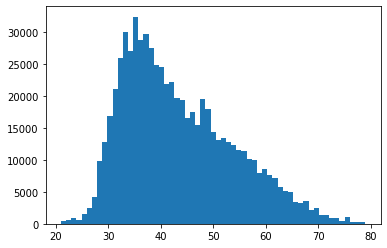

In [12]:
hist(res.age, weights=res.c, bins=len(res))

In [18]:
res = Q("""
SELECT
    age,
    sum( CASE WHEN sex="F" then 1 end) as "F",
    sum( CASE WHEN sex="M" then 1 end) as "M"
from 
 Citi_Bike_Clean
GROUP BY 1
""")

In [19]:
res.head()

,age,F,M
0,21,82,314
1,22,66,468
2,23,194,634
3,24,194,438
4,25,268,1230


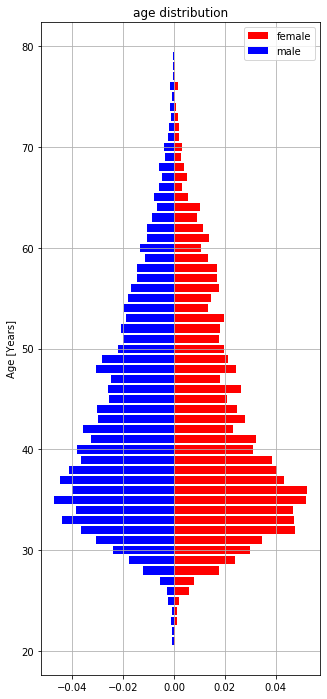

In [20]:
figure(figsize=(5,12))
barh(res.age, res.F/res.F.sum(), color='r', label='female')
barh(res.age, -res.M/res.M.sum(), color ='b', label = 'male')
title('age distribution')
ylabel("Age [Years]")
grid()
legend()

In [27]:
res = Q("""
SELECT
    age,
    sum( CASE WHEN usertype = "Subscriber" then 1 end) as s,
    sum( CASE WHEN usertype != "Subscriber" then 1 end) as d
from 
 Citi_Bike_Clean
GROUP BY 1
""")
res.head()

,age,s,d
0,21,None,396
1,22,None,534
2,23,None,832
3,24,None,632
4,25,None,1498


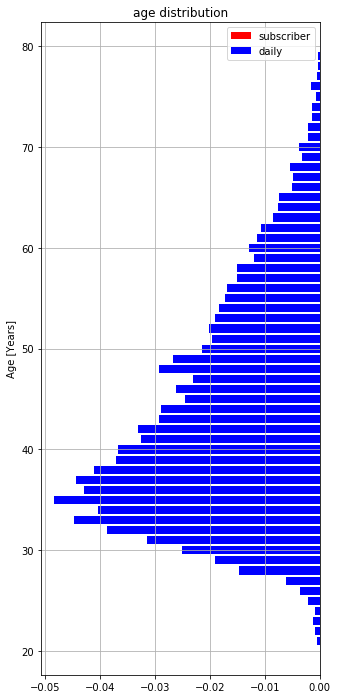

In [25]:
figure(figsize=(5,12))
barh(res.age, res.s/res.s.sum(), color='r', label='subscriber')
barh(res.age, -res.d/res.d.sum(), color ='b', label = 'daily')
title('age distribution')
ylabel("Age [Years]")
grid()
legend()